In [1]:
import os
import pandas as pd
import re
from enum import Enum

## Utils

In [16]:
class LoadTestingTypes(Enum):
    INITIAL_PAGE_LOAD = 'initial_page_load'
    TICKETS_FUNCTIONALITY = 'tickets_functionality'

In [8]:
def extract_number(string):
  """Extracts the number from a string.

  Args:
    string (str): The input string.

  Returns:
    int: The extracted number, or None if not found.
  """

  match = re.search(r"\d+", string)
  if match:
    return int(match.group())
  else:
    return None

In [42]:
def load_csv_files(path):
    """Loads all CSV files from the given path and returns a list of DataFrames.

    Args:
        path (str): The path to the directory containing the CSV files.

    Returns:
        dict[pd.DataFrame]: A dict of DataFrames, one for each CSV file.
    """

    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    dataframes = {LoadTestingTypes.INITIAL_PAGE_LOAD: {}, LoadTestingTypes.TICKETS_FUNCTIONALITY: {}}

    for file in csv_files:
        file_path = os.path.join(path, file)
        df = pd.read_csv(file_path)
        lt_type = LoadTestingTypes.INITIAL_PAGE_LOAD if LoadTestingTypes.INITIAL_PAGE_LOAD.value in file_path else LoadTestingTypes.TICKETS_FUNCTIONALITY
        dataframes[lt_type][extract_number(file_path)] = df

    return dataframes

## Prepare Data

In [74]:
dataframes = load_csv_files(".")

initial_page_load = dataframes[LoadTestingTypes.INITIAL_PAGE_LOAD]
tickets_functionality = dataframes[LoadTestingTypes.TICKETS_FUNCTIONALITY]

initial_page_load[32]

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1727054333371,2191,HTTP Request,200,OK,Thread Group - Initial Page Load 1-5,text,True,NaN,12176,116,10,11,http://127.0.0.1:3000/,2185,0,1
1,1727054333745,1826,HTTP Request,200,OK,Thread Group - Initial Page Load 1-6,text,True,NaN,12176,116,9,10,http://127.0.0.1:3000/,1821,0,1
2,1727054332995,2577,HTTP Request,200,OK,Thread Group - Initial Page Load 1-4,text,True,NaN,12176,116,8,9,http://127.0.0.1:3000/,2572,0,1
3,1727054332248,3325,HTTP Request,200,OK,Thread Group - Initial Page Load 1-2,text,True,NaN,12176,116,7,8,http://127.0.0.1:3000/,3320,0,0
4,1727054332622,2967,HTTP Request,200,OK,Thread Group - Initial Page Load 1-3,text,True,NaN,12176,116,6,7,http://127.0.0.1:3000/,2955,0,0
5,1727054334870,726,HTTP Request,200,OK,Thread Group - Initial Page Load 1-9,text,True,NaN,12176,116,5,6,http://127.0.0.1:3000/,726,0,1
6,1727054334494,1104,HTTP Request,200,OK,Thread Group - Initial Page Load 1-8,text,True,NaN,12176,116,4,5,http://127.0.0.1:3000/,1104,0,1
7,1727054334121,1479,HTTP Request,200,OK,Thread Group - Initial Page Load 1-7,text,True,NaN,12176,116,3,4,http://127.0.0.1:3000/,1479,0,1
8,1727054331974,3628,HTTP Request,200,OK,Thread Group - Initial Page Load 1-1,text,True,NaN,12176,116,2,3,http://127.0.0.1:3000/,3628,0,19
9,1727054335243,383,HTTP Request,200,OK,Thread Group - Initial Page Load 1-10,text,True,NaN,12176,116,2,2,http://127.0.0.1:3000/,381,0,0


## Initial Page Load

In [68]:
latency = {}
for users, data in initial_page_load.items():
    latency[users] = data['Latency']

latency_df = pd.DataFrame(latency)
latency_df

,32,512,128,64,256,1024
0,2185.0,4839.0,104.0,3702.0,115.0,11304
1,1821.0,5096.0,108.0,3516.0,117.0,11305
2,2572.0,5112.0,59.0,3142.0,125.0,11305
3,3320.0,5113.0,25.0,2955.0,93.0,11298
4,2955.0,5114.0,37.0,3792.0,63.0,11306
...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,12345
1020,NaN,NaN,NaN,NaN,NaN,10330
1021,NaN,NaN,NaN,NaN,NaN,10321
1022,NaN,NaN,NaN,NaN,NaN,12372


<Axes: title={'center': 'Initial Page Load'}, xlabel='# Users', ylabel='Latency'>

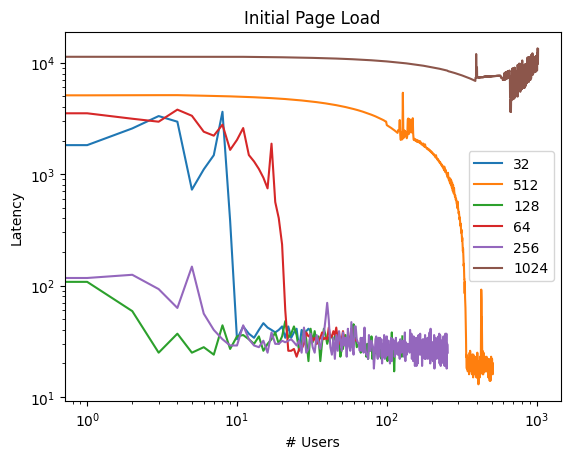

In [59]:
latency_df.plot(title="Initial Page Load", loglog=True, ylabel = "Latency", xlabel = "# Users")

## Tickets Functionality

In [69]:
latency = {}
for users, data in tickets_functionality.items():
    latency[users] = data['Latency']

latency_df = pd.DataFrame(latency)
latency_df

,512,1024,256,32,64,128
0,3692.0,7454,98.0,1009.0,3192.0,91.0
1,3652.0,7167,67.0,2130.0,3003.0,68.0
2,3672.0,7262,105.0,1757.0,2815.0,21.0
3,3760.0,7526,93.0,2881.0,936.0,15.0
4,3783.0,7158,46.0,3547.0,3385.0,20.0
...,...,...,...,...,...,...
1019,NaN,12173,NaN,NaN,NaN,NaN
1020,NaN,12091,NaN,NaN,NaN,NaN
1021,NaN,12106,NaN,NaN,NaN,NaN
1022,NaN,12117,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Tickets Functionality'}, xlabel='# Users', ylabel='Latency'>

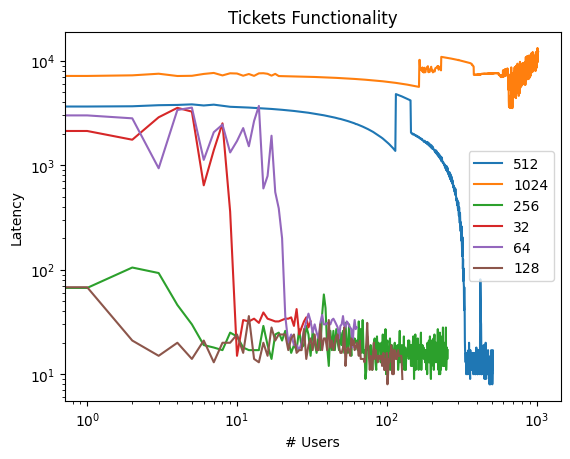

In [76]:
latency_df.plot(title="Tickets Functionality", loglog=True, ylabel = "Latency", xlabel = "# Users")

## Summary

It's expected that our app handles well a relatively low load (<= 256 users) and that it increases on higher loads (512 and 1024 users).

TBD, why the latency goes to zero for 512 but keeps increasing for 1024.

All runs were performed in a clean env.

I believe the latency suddenly dropping to zero is because the server dies due to high loads.